In [1]:
# Retreive Archived Data

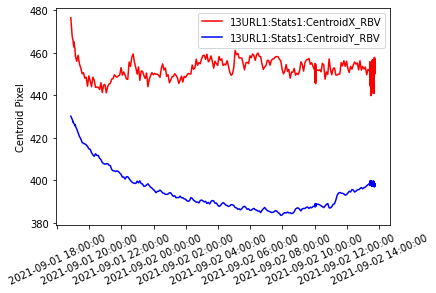

In [1]:

import numpy as np
from urllib.request import urlopen
import urllib.parse

import json
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time

#http://sissy-serv-04.exp.helmholtz-berlin.de:17668/retrieval/ui/viewer/archViewer.html?pv=13URL1%3AStats1%3ACentroidX_RBV



def getArchiveData(PV_Name,Archiver_URL,from_time,to_time):
    
    req = urlopen("http://"+Archiver_URL +":17668/retrieval/data/getData.json?pv=" + urllib.parse.quote_plus(PV_Name) +"&from="+urllib.parse.quote_plus(from_time)+"Z&to="+urllib.parse.quote_plus(to_time)+"Z")
    data = json.load(req)
    
    secs = [x['secs'] +x['nanos']*10e-9 for x in data[0]['data']]
    dates=[dt.datetime.fromtimestamp(ts) for ts in secs]

    vals = [x['val'] for x in data[0]['data']]
    
    return dates, vals

    
PV_Name1 = "13URL1:Stats1:CentroidX_RBV"
from_time ="2021-09-01T16:55:00.000"
to_time = "2021-09-02T13:00:00.000"
Archvier_URL ="sissy-serv-04.exp.helmholtz-berlin.de"

dates1, vals1 = getArchiveData(PV_Name1,Archvier_URL, from_time, to_time)



import matplotlib.pyplot as plt
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(dates1, vals1, "r-",label=PV_Name1)


PV_Name2 = "13URL1:Stats1:CentroidY_RBV"

dates2, vals2 = getArchiveData(PV_Name2,Archvier_URL, from_time, to_time)

plt.plot(dates2, vals2, "b-", label=PV_Name2)
plt.ylabel("Centroid Pixel")
plt.legend()

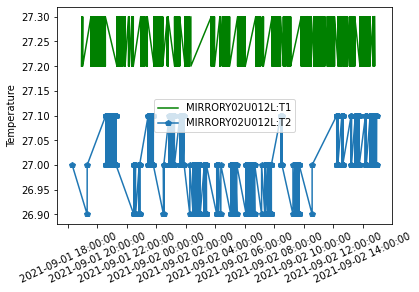

In [3]:
PV_Name3 = "MIRRORY02U012L:T1"
from_time ="2021-09-01T16:55:00.000"
to_time = "2021-09-02T13:00:00.000"
Archvier_URL ="archiver.bessy.de"

dates3, vals3 = getArchiveData(PV_Name3,Archvier_URL, from_time, to_time)

plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(dates3, vals3, "g-", label=PV_Name3)
plt.legend()

PV_Name4 = "MIRRORY02U012L:T2"


dates4, vals4 = getArchiveData(PV_Name4,Archvier_URL, from_time, to_time)

plt.plot(dates4, vals4, "p-", label=PV_Name4)
plt.ylabel("Temperature")
plt.legend()

In [3]:
import csv

with open('data.csv','w') as fd:
    writer = csv.writer(fd)
    writer.writerow(["time", PV_Name1,"time", PV_Name2,"time", PV_Name3,"time", PV_Name4])
    
with open('data.csv', 'a') as f:
    writer = csv.writer(f)
    
    writer.writerows(zip(dates1, vals1,dates2, vals2,dates3, vals3,dates4, vals4))